In [19]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import acquire
import prepare
import env


from pydataset import data

# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [20]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


# Create a new notebook, random_forests, and work with titanic data to do the following:



In [21]:
from acquire import get_titanic_data
titanic = get_titanic_data()
titanic.head()

from prepare import prep_titanic
titanic = prep_titanic(titanic)
titanic.head()

titanic = titanic.drop(columns=['passenger_id', 'sex', 'embarked', 'class', 'deck', 'embark_town'])
titanic['age'] = titanic['age'].fillna(29)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


### Fit the Random Forest classifier to your training sample and transform 

### (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [22]:
from prepare import split_titanic_data
train, validate, test = split_titanic_data(titanic)


print(f'train data -> {train.shape}')
print(f'validate data -> {validate.shape}')
print(f'test data -> {test.shape}')

train data -> (498, 7)
validate data -> (214, 7)
test data -> (179, 7)


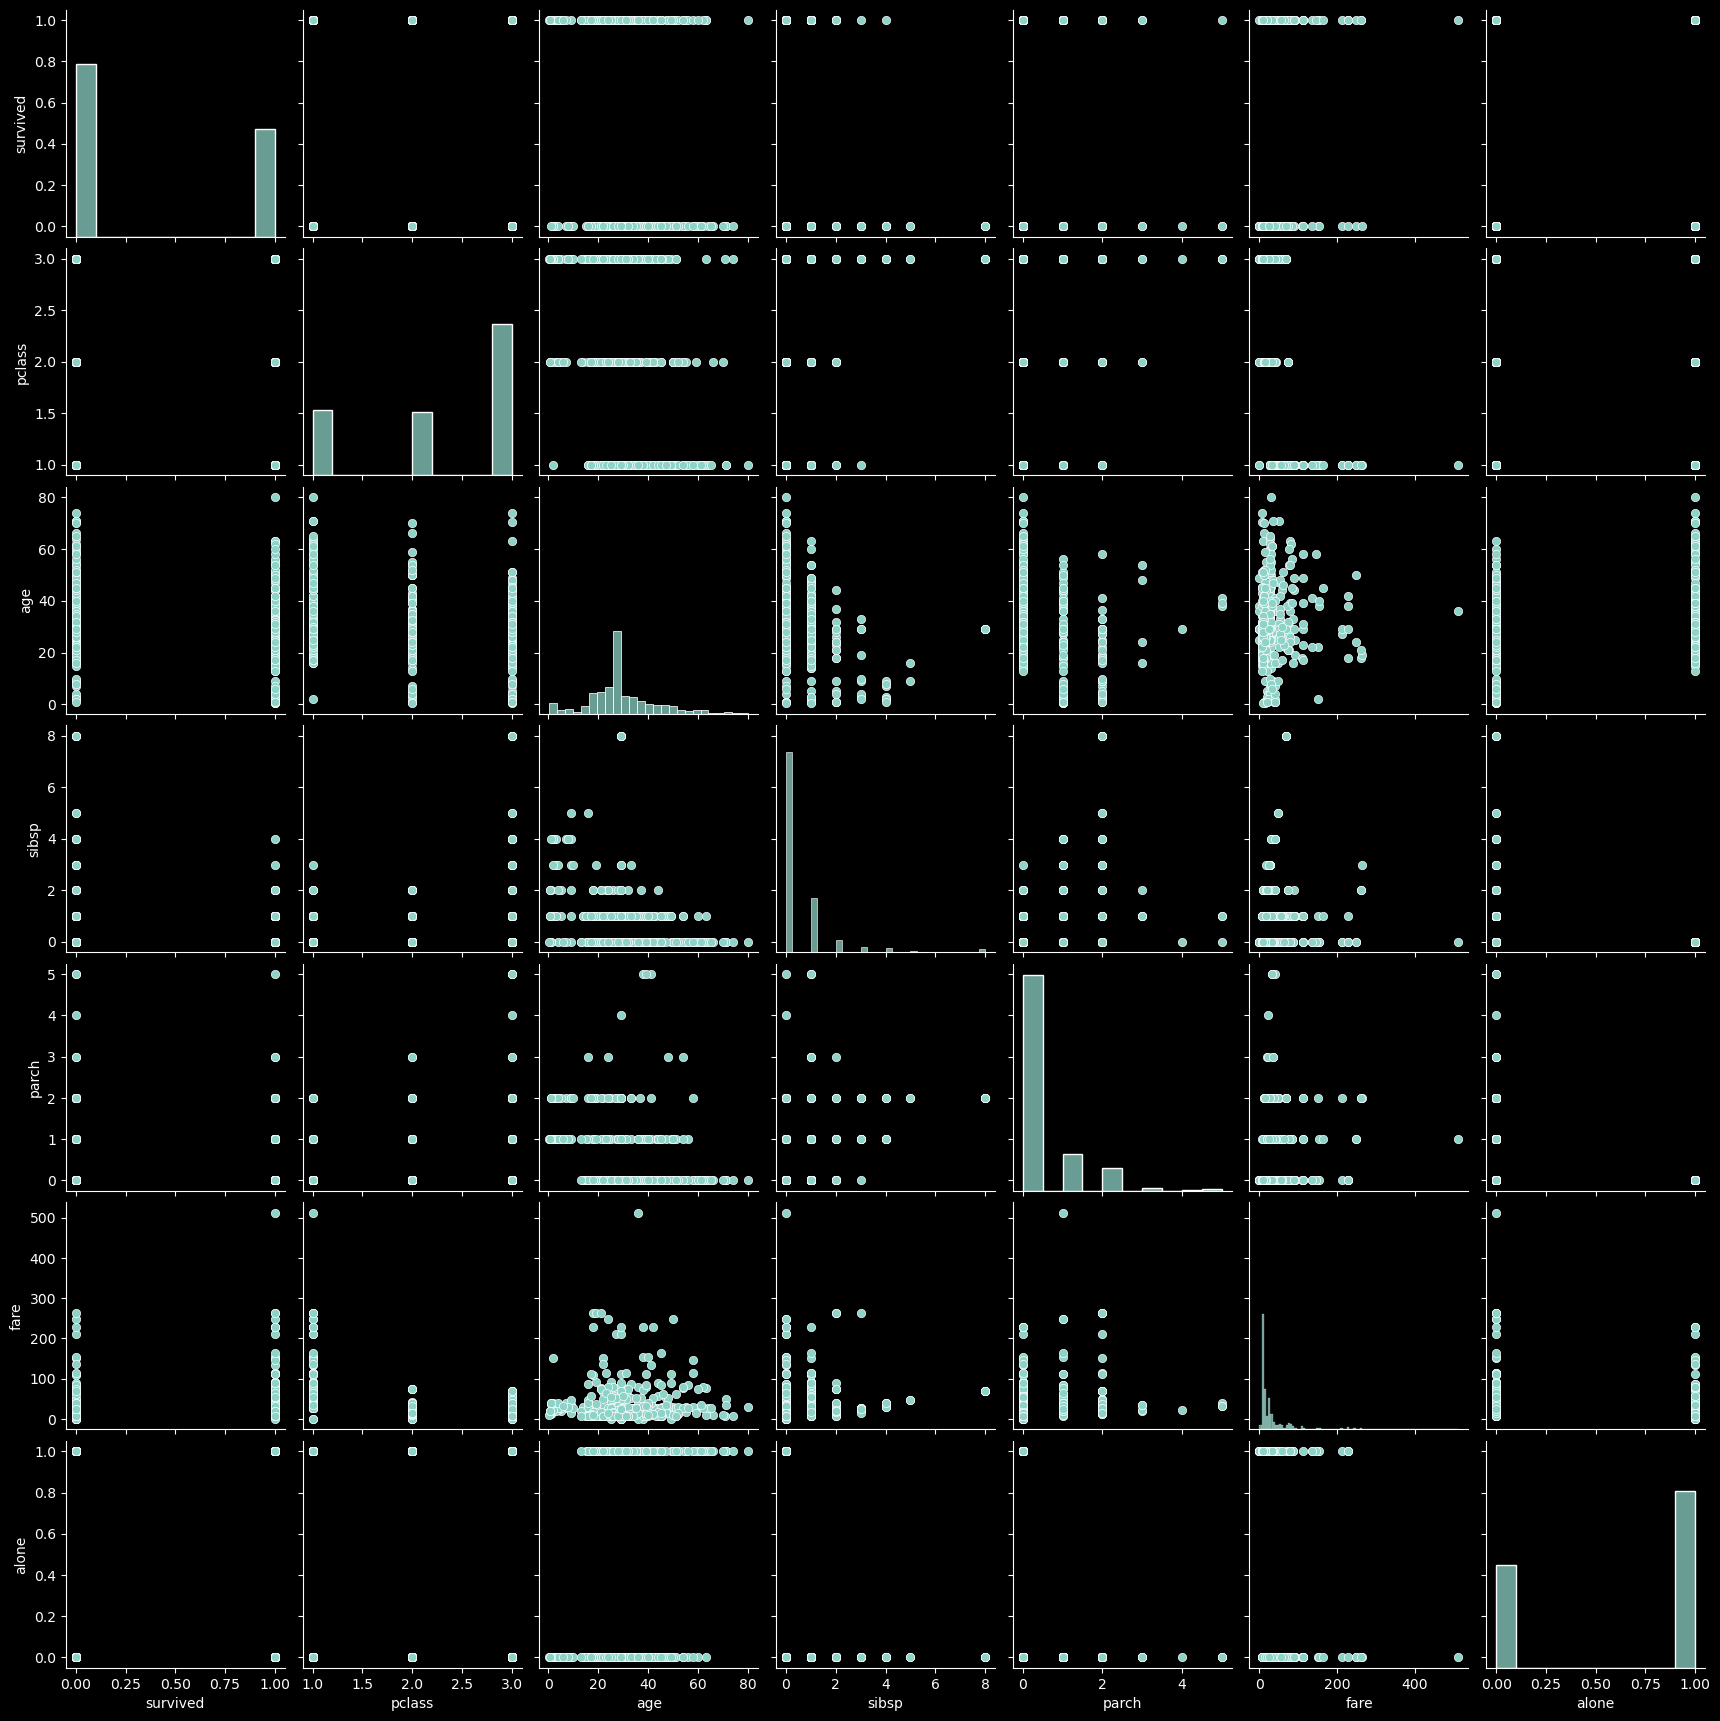

In [23]:
sns.pairplot(train)

In [24]:
# baseline will be not survived (0)
# why because it is the most common 

train.survived.value_counts()

survived
0    307
1    191
Name: count, dtype: int64

In [25]:
baseline_accuracy = (train['survived'] == 0).mean()
baseline_accuracy

0.6164658634538153

In [26]:
#Baseline Prediction : 0
#Baseline accuracy : 0.616

In [27]:
# SPLIT DATA INTO X AND Y DATA SETS
X_train = train.drop(columns=['survived'])

X_validate = validate.drop(columns=['survived'])

X_test = test.drop(columns=['survived'])

y_train = train.survived

y_validate = validate.survived 

y_test = test.survived

In [28]:
rf = RandomForestClassifier(max_depth=10, random_state= 123, min_samples_leaf=1)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

### Evaluate your results using the model score, confusion matrix, and classification report.



In [30]:
rf.score(X_train, y_train)

0.929718875502008

In [31]:
y_pred = rf.predict(X_train)

In [32]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       307
           1       0.96      0.85      0.90       191

    accuracy                           0.93       498
   macro avg       0.94      0.91      0.92       498
weighted avg       0.93      0.93      0.93       498



In [33]:
confusion_matrix(y_train, y_pred)

array([[301,   6],
       [ 29, 162]])

In [34]:
confusion = confusion_matrix(y_train, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)
print('')
print(f'True Positive -> {TP}')
print(f'True Negative -> {TN}')
print(f'False Positive -> {FP}')
print(f'False Negative -> {FN}')

[[301   6]
 [ 29 162]]

True Positive -> 162
True Negative -> 301
False Positive -> 6
False Negative -> 29


In [35]:
pd.DataFrame(
    confusion_matrix(y_train, y_pred),
    columns=['pred survived', 'pred opposite'],
    index=['actual opposite', 'actual survived']
)

,pred survived,pred opposite
actual opposite,301,6
actual survived,29,162


### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [ ]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [ ]:
compute_metrics(TN, FN, FP, TP)

Accuracy: 0.9658634538152611

True Positive Rate/Sensitivity/Recall/Power: 1.0
False Positive Rate/False Alarm Ratio/Fall-out: 0.05246913580246913
True Negative Rate/Specificity/Selectivity: 0.9475308641975309
False Negative Rate/Miss Rate: 0.0

Precision/PPV: 0.9109947643979057
F1 Score: 0.9534246575342465

Support (0): 174
Support (1): 324


### Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [ ]:
# Min leaf 2

for x in range(1,9):
#     print(x)
    tree = RandomForestClassifier(max_depth=x, random_state=123, min_samples_leaf=2)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.78
for depth of  2, the accuracy is 0.82
for depth of  3, the accuracy is 0.84
for depth of  4, the accuracy is 0.86
for depth of  5, the accuracy is 0.86
for depth of  6, the accuracy is 0.88
for depth of  7, the accuracy is 0.91
for depth of  8, the accuracy is 0.92


In [ ]:
# Min leaf 3

for x in range(1,9):
#     print(x)
    tree = RandomForestClassifier(max_depth=x, random_state=123, min_samples_leaf=3)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.78
for depth of  2, the accuracy is 0.82
for depth of  3, the accuracy is 0.85
for depth of  4, the accuracy is 0.85
for depth of  5, the accuracy is 0.86
for depth of  6, the accuracy is 0.88
for depth of  7, the accuracy is 0.9
for depth of  8, the accuracy is 0.9


In [ ]:
# Min leaf 4

for x in range(1,9):
#     print(x)
    tree = RandomForestClassifier(max_depth=x, random_state=123, min_samples_leaf=4)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.78
for depth of  2, the accuracy is 0.82
for depth of  3, the accuracy is 0.84
for depth of  4, the accuracy is 0.85
for depth of  5, the accuracy is 0.86
for depth of  6, the accuracy is 0.87
for depth of  7, the accuracy is 0.89
for depth of  8, the accuracy is 0.89


In [ ]:
# Min leaf 5

for x in range(1,9):
#     print(x)
    tree = RandomForestClassifier(max_depth=x, random_state=123, min_samples_leaf=5)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.78
for depth of  2, the accuracy is 0.82
for depth of  3, the accuracy is 0.83
for depth of  4, the accuracy is 0.85
for depth of  5, the accuracy is 0.86
for depth of  6, the accuracy is 0.87
for depth of  7, the accuracy is 0.88
for depth of  8, the accuracy is 0.88


In [39]:
scores_all = []

for x in range(1,11):
    
    # looping through min_samples_leaf front to back 
    # looping through max_depth back to front
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x) # different if x = 10 vs x = 1
    #fit it
    rf.fit(X_train, y_train)
    #transform it
    train_acc = rf.score(X_train, y_train)
    
    #evaluate on my validate data
    val_acc = rf.score(X_validate, y_validate)
    
    print(f'min_samples_leaf = {x} max_depth = {11-x}, accuracy = {train_acc, val_acc}')
    
    scores_all.append([x, 11-x, train_acc, val_acc])

min_samples_leaf = 1 max_depth = 10, accuracy = (0.929718875502008, 0.7429906542056075)
min_samples_leaf = 2 max_depth = 9, accuracy = (0.8514056224899599, 0.7570093457943925)
min_samples_leaf = 3 max_depth = 8, accuracy = (0.8232931726907631, 0.7710280373831776)
min_samples_leaf = 4 max_depth = 7, accuracy = (0.8052208835341366, 0.7570093457943925)
min_samples_leaf = 5 max_depth = 6, accuracy = (0.7650602409638554, 0.7336448598130841)
min_samples_leaf = 6 max_depth = 5, accuracy = (0.7550200803212851, 0.7523364485981309)
min_samples_leaf = 7 max_depth = 4, accuracy = (0.7389558232931727, 0.7336448598130841)
min_samples_leaf = 8 max_depth = 3, accuracy = (0.7289156626506024, 0.7429906542056075)
min_samples_leaf = 9 max_depth = 2, accuracy = (0.7108433734939759, 0.7149532710280374)
min_samples_leaf = 10 max_depth = 1, accuracy = (0.6907630522088354, 0.6869158878504673)


In [40]:
scores_df = pd.DataFrame(scores_all, columns =['min_samples_leaf','max_depth','train_acc','val_acc'])
scores_df

,min_samples_leaf,max_depth,train_acc,val_acc
0,1,10,0.929719,0.742991
1,2,9,0.851406,0.757009
2,3,8,0.823293,0.771028
3,4,7,0.805221,0.757009
4,5,6,0.765060,0.733645
5,6,5,0.755020,0.752336
6,7,4,0.738956,0.733645
7,8,3,0.728916,0.742991
8,9,2,0.710843,0.714953
9,10,1,0.690763,0.686916


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [41]:
scores_df['difference'] = scores_df.train_acc - scores_df.val_acc
scores_df.sort_values('difference', ascending=True)


,min_samples_leaf,max_depth,train_acc,val_acc,difference
7,8,3,0.728916,0.742991,-0.014075
8,9,2,0.710843,0.714953,-0.004110
5,6,5,0.755020,0.752336,0.002684
9,10,1,0.690763,0.686916,0.003847
6,7,4,0.738956,0.733645,0.005311
4,5,6,0.765060,0.733645,0.031415
3,4,7,0.805221,0.757009,0.048212
2,3,8,0.823293,0.771028,0.052265
1,2,9,0.851406,0.757009,0.094396
0,1,10,0.929719,0.742991,0.186728


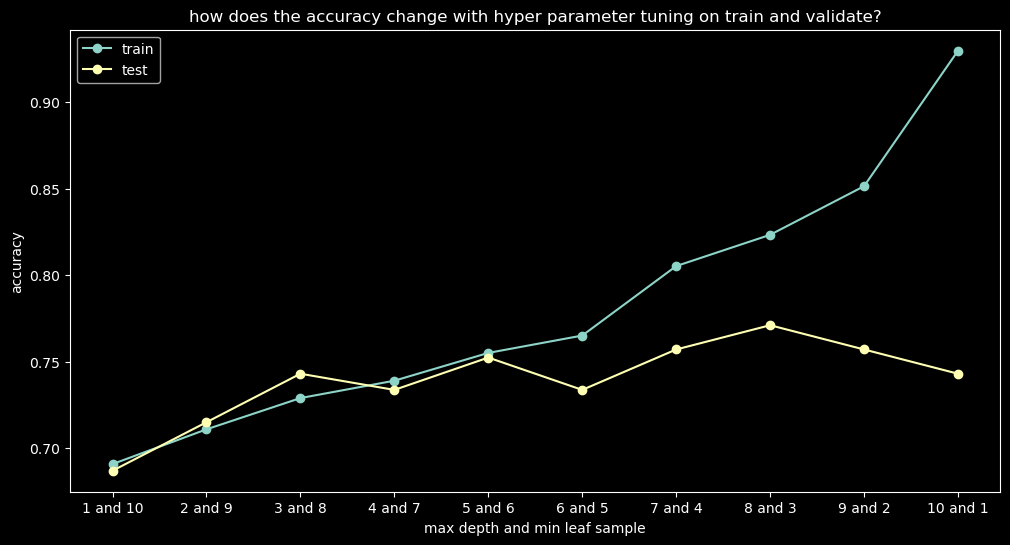

In [42]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='test', marker='o')
plt.xlabel('max depth and min leaf sample')
plt.ylabel('accuracy')

plt.xticks([1,2,3,4,5,6,7,8,9,10],
          [('1 and 10'),('2 and 9'),('3 and 8'),('4 and 7'),('5 and 6'),
          ('6 and 5'),('7 and 4'), ('8 and 3'), ('9 and 2'), ('10 and 1') ]
          )

plt.title('how does the accuracy change with hyper parameter tuning on train and validate?')
plt.legend()
plt.show()

In [43]:
# charts can be misleading, sometimes better to look at a dataframe
scores_df.sort_values('difference')

,min_samples_leaf,max_depth,train_acc,val_acc,difference
7,8,3,0.728916,0.742991,-0.014075
8,9,2,0.710843,0.714953,-0.004110
5,6,5,0.755020,0.752336,0.002684
9,10,1,0.690763,0.686916,0.003847
6,7,4,0.738956,0.733645,0.005311
4,5,6,0.765060,0.733645,0.031415
3,4,7,0.805221,0.757009,0.048212
2,3,8,0.823293,0.771028,0.052265
1,2,9,0.851406,0.757009,0.094396
0,1,10,0.929719,0.742991,0.186728


The optimal model had a Max_depth of 5 and min_samples_leaf of 16. This performs best on our in sample data because it has the smallest amount of drop off between its train and test set so were achieving the most balance with this model: 

Although we get high validation accuracy for index 2 & 1 they also have a large amoutn of variance between these models


Train Acc: 75.1%


Test Acc: 71.1%